# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [40]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import datetime

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [41]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

610

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [42]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{url}appid={api_key}&units={units}&q="

list_ctw = [];  #list of city weather

print('Beginning Data Retrieval')
print('--------------------------------------')
for index, city in enumerate(cities, start = 1) :
    response = requests.get(query_url + city)
    
    print(f"Processing Record ({index}) {city} ")
    if(response.status_code == 200):
        response_json = response.json()
        list_ctw.append({'city': response_json['name'],
                           'cloudiness': response_json['clouds']['all'],
                           'country': response_json['sys']['country'],
                           'date': response_json['dt'],
                           'humidity': response_json['main']['humidity'],
                           'lat': response_json['coord']['lat'],
                           'lng': response_json['coord']['lon'],
                           'max_temp' : response_json['main']['temp_max'],
                           'wind_speed': response_json['wind']['speed']               
                          })
    else:
        print("City not found. Skipping...")

df_ctf = pd.DataFrame(list_ctw)


Beginning Data Retrieval
--------------------------------------
Processing Record (1) juba 
Processing Record (2) codrington 
Processing Record (3) bethel 
Processing Record (4) rikitea 
Processing Record (5) penzance 
Processing Record (6) comodoro rivadavia 
Processing Record (7) clyde river 
Processing Record (8) belushya guba 
City not found. Skipping...
Processing Record (9) tuktoyaktuk 
Processing Record (10) punta arenas 
Processing Record (11) ucluelet 
Processing Record (12) carnarvon 
Processing Record (13) puerto ayora 
Processing Record (14) attawapiskat 
City not found. Skipping...
Processing Record (15) saint-philippe 
Processing Record (16) palabuhanratu 
City not found. Skipping...
Processing Record (17) ushuaia 
Processing Record (18) tasiilaq 
Processing Record (19) grindavik 
Processing Record (20) port perry 
Processing Record (21) meulaboh 
Processing Record (22) taolanaro 
City not found. Skipping...
Processing Record (23) new norfolk 
Processing Record (24) busse

Processing Record (225) paamiut 
Processing Record (226) nelson bay 
Processing Record (227) samusu 
City not found. Skipping...
Processing Record (228) skjervoy 
Processing Record (229) somerset 
Processing Record (230) marcona 
City not found. Skipping...
Processing Record (231) shitanjing 
Processing Record (232) khorixas 
Processing Record (233) bulgan 
Processing Record (234) dinsor 
City not found. Skipping...
Processing Record (235) dwarka 
Processing Record (236) hithadhoo 
Processing Record (237) lazarev 
Processing Record (238) leningradskiy 
Processing Record (239) sinnamary 
Processing Record (240) antofagasta 
Processing Record (241) shenjiamen 
Processing Record (242) sorong 
Processing Record (243) nanortalik 
Processing Record (244) najran 
Processing Record (245) mordovo 
Processing Record (246) hualmay 
Processing Record (247) sao joao da barra 
Processing Record (248) algiers 
Processing Record (249) warwick 
Processing Record (250) laguna 
Processing Record (251) ug

Processing Record (443) chalmette 
Processing Record (444) bafq 
Processing Record (445) dianopolis 
City not found. Skipping...
Processing Record (446) altamira 
Processing Record (447) san luis 
Processing Record (448) mathathane 
Processing Record (449) mabaruma 
Processing Record (450) ludhiana 
Processing Record (451) uthai thani 
Processing Record (452) luderitz 
Processing Record (453) chlorakas 
City not found. Skipping...
Processing Record (454) soderhamn 
Processing Record (455) vuktyl 
Processing Record (456) usuki 
Processing Record (457) ambovombe 
Processing Record (458) okhotsk 
Processing Record (459) san patricio 
Processing Record (460) paulista 
Processing Record (461) anyang 
Processing Record (462) mentok 
City not found. Skipping...
Processing Record (463) saint-georges 
Processing Record (464) turukhansk 
Processing Record (465) tessalit 
Processing Record (466) craig 
Processing Record (467) beaver dam 
Processing Record (468) andapa 
Processing Record (469) kav

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [43]:
df_ctf.to_csv('output\cities_weather.csv', encoding='utf-8', index=False)
df_ctf.date = pd.to_datetime(df_ctf.date, unit='s')
df_ctf

city  cloudiness country                date  humidity  \
0                     Juba          81      EE 2019-11-22 20:29:49        50   
1               Codrington          40      AU 2019-11-22 20:29:49        93   
2                   Bethel          90      US 2019-11-22 20:27:17        92   
3                  Rikitea          61      PF 2019-11-22 20:30:04        83   
4                 Penzance          75      GB 2019-11-22 20:30:04        93   
5       Comodoro Rivadavia           0      AR 2019-11-22 20:30:04        39   
6              Clyde River          90      CA 2019-11-22 20:30:04        92   
7              Tuktoyaktuk          90      CA 2019-11-22 20:30:04        85   
8             Punta Arenas          40      CL 2019-11-22 20:26:29        38   
9                 Ucluelet          75      CA 2019-11-22 20:27:17        81   
10               Carnarvon           0      ZA 2019-11-22 20:30:05        32   
11            Puerto Ayora          20      EC 2019-11-22 20:30:05        61   
12          Saint-Philippe          75      CA 2019-11-22 20:30:26        59   
13                 Ushuaia          75      AR 2019-11-22 20:27:30        47   
14                Tasiilaq          20      GL 2019-11-22 20:30:26        68   
15               Grindavik          90      IS 2019-11-22 20:30:26       100   
16              Port Perry          90      CA 2019-11-22 20:30:26        69   
17                Meulaboh         100      ID 2019-11-22 20:30:26        90   
18             New Norfolk          75      AU 2019-11-22 20:30:27        50   
19               Busselton           0      AU 2019-11-22 20:30:27        60   
20               Thinadhoo          53      MV 2019-11-22 20:30:27        78   
21                 Mataura         100      NZ 2019-11-22 20:30:28        82   
22                    Bath          20      GB 2019-11-22 20:30:04        87   
23                  Narsaq          75      GL 2019-11-22 20:30:28        49   
24                  Kodiak          75      US 2019-11-22 20:30:28        69   
25      Sault Sainte Marie          90      CA 2019-11-22 20:30:28        63   
26                  Barrow          33      AR 2019-11-22 20:30:28        36   
27            Ponta do Sol         100      BR 2019-11-22 20:30:28        87   
28                  Hegang         100      CN 2019-11-22 20:30:29        92   
29                Seminole          75      US 2019-11-22 20:30:29        66   
..                     ...         ...     ...                 ...       ...   
520   Vila Franca do Campo          40      PT 2019-11-22 20:31:46        88   
521                  Synya         100      RU 2019-11-22 20:31:47        98   
522                  Mendi          85      ET 2019-11-22 20:31:47        68   
523         Porto Nacional          40      BR 2019-11-22 20:31:47        55   
524               Nykoping          90      SE 2019-11-22 20:31:47       100   
525            Mujiayingzi         100      CN 2019-11-22 20:31:47        86   
526                    Vao          68      EE 2019-11-22 20:31:47        49   
527                   Axim           0      GH 2019-11-22 20:31:47        87   
528  Los Llanos de Aridane          40      ES 2019-11-22 20:31:47        73   
529  Imeni Poliny Osipenko         100      RU 2019-11-22 20:31:48        96   
530                   Shar          95      NG 2019-11-22 20:31:48        75   
531                Taksimo         100      RU 2019-11-22 20:31:48        82   
532               Coquimbo          20      CL 2019-11-22 20:31:48        60   
533                  Sabha           0      LY 2019-11-22 20:31:48        36   
534              Zhigalovo         100      RU 2019-11-22 20:31:48        97   
535               Filingue         100      NE 2019-11-22 20:31:48        15   
536               Dongning         100      CN 2019-11-22 20:31:48        86   
537                  Yauya          98      PE 2019-11-22 20:31:48        60   
538                  O

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

<Figure size 432x288 with 0 Axes>

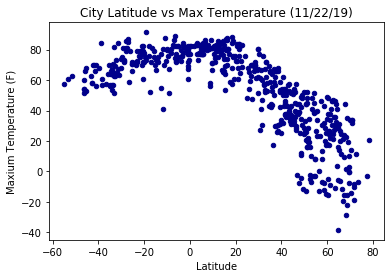

In [44]:
current_date = datetime.date.today().strftime("%m/%d/%y")
chart_title = f'City Latitude vs Max Temperature ({current_date})'
fig = plt.figure()
ax = df_ctf.plot.scatter(x='lat',
                       y='max_temp',
                       c='DarkBlue', title=chart_title)
ax.set_xlabel('Latitude')
ax.set_ylabel('Maxium Temperature (F)')
fig.savefig('output\latitude_vs_temperatur.png')

#### Latitude vs. Humidity Plot

#### Latitude vs. Cloudiness Plot

#### Latitude vs. Wind Speed Plot